## Dragon Real State Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv('data.csv')

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,ROX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   ROX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,ROX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.282591,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702003,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt
# housing.hist(bins=50, figsize=(20,15))

## Train-Test Splitting

In [9]:
# For learning purpose
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
# train_set, test_set = split_train_test(housing, 0.2)

In [11]:
# print(f"Rows in train set  : {len(train_set)}\nRows in test set   : {len(test_set)}")

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set  : {len(train_set)}\nRows in test set   : {len(test_set)}")

Rows in train set  : 404
Rows in test set   : 102


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
# strat_test_set['CHAS'].value_counts()

In [15]:
# strat_train_set['CHAS'].value_counts()
housing = strat_train_set.copy()

## Looking for corelations

In [16]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.675074
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
ROX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [17]:
from pandas.plotting import scatter_matrix

In [18]:
attributes = ["RM","ZN", "MEDV","LSTAT"]

array([[<Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

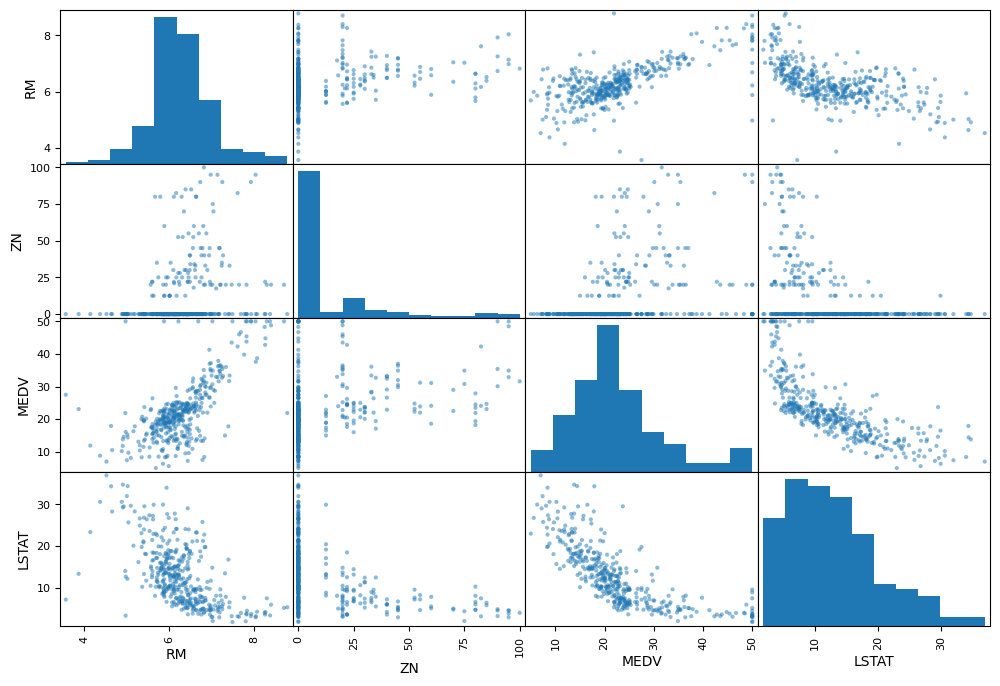

In [19]:
scatter_matrix(housing[attributes], figsize = (12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

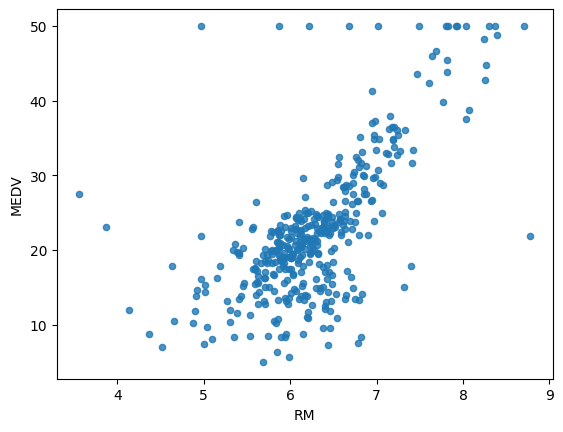

In [20]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

## Trying out Attribute Combination

In [21]:
housing['TAXRM']= housing['TAX']/housing['RM']

In [22]:
housing.head()

,CRIM,ZN,INDUS,CHAS,ROX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [23]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.675074
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
ROX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.524541
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [24]:
## Missing Attributes

In [25]:
# To take care of missing attributes, you have 3 options :
#      1. Get rid of missing data points
#      2. Get rid of whole attribute
#      3. Set the value to some value (0, mean or median)

In [26]:
a=housing.dropna(subset=["RM"])      #Option 1   to change data we have to set inplace to true 
a.shape
# Original data is still unchanged

(399, 15)

In [27]:
housing.drop(["RM"],axis=1).shape  #Option 2  
# Original data is still unchanged

(404, 14)

In [28]:
median = housing["RM"].median()

In [29]:
median

6.209

In [30]:
housing['RM'].fillna(median)
# Original data is still unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [31]:
housing.describe()               #Data count before imputing

,CRIM,ZN,INDUS,CHAS,ROX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.277283,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406,67.773282
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712334,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531,31.500482
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000,24.645639
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000,45.015779
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000,54.831220
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000,98.673976
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000,187.026116


In [32]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy= "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [33]:
imputer.statistics_

array([2.86735000e-01, 0.00000000e+00, 9.90000000e+00, 0.00000000e+00,
       5.38000000e-01, 6.20900000e+00, 7.82000000e+01, 3.12220000e+00,
       5.00000000e+00, 3.37000000e+02, 1.90000000e+01, 3.90955000e+02,
       1.15700000e+01, 2.11500000e+01, 5.48312199e+01])

In [34]:
X= imputer.transform(housing)

In [35]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [36]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,ROX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.276438,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406,67.613108
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.707942,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531,31.337224
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000,24.645639
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000,45.168593
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000,54.831220
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000,98.317507
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000,187.026116


## Scikit Learn

Primarily three types of objects
1. Estimators - It estimates some parameter based on dataset. Example Imputer, It has fit(fits the dataset, calculates internal prameter) method

2.Transformers - transform(takes input and returns output based on fit) methods

3.Predictor - LinearRegression model is an example of predictor, fit() and predict() are two common funcs. It will also gives score func that evaluate
your predictions

In [ ]:
##